In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /bank_customer.csv')

In [3]:
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

In [4]:
X = data.drop(columns=['customer_id', 'churn'])
y = data['churn']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
    return accuracy, precision, recall, f1

In [10]:
svm_metrics = evaluate_model(y_test, y_pred_svm, "SVM")

dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

SVM Performance:
Accuracy: 0.86
Precision: 0.80
Recall: 0.37
F1 Score: 0.50

Decision Tree Performance:
Accuracy: 0.78
Precision: 0.45
Recall: 0.52
F1 Score: 0.48



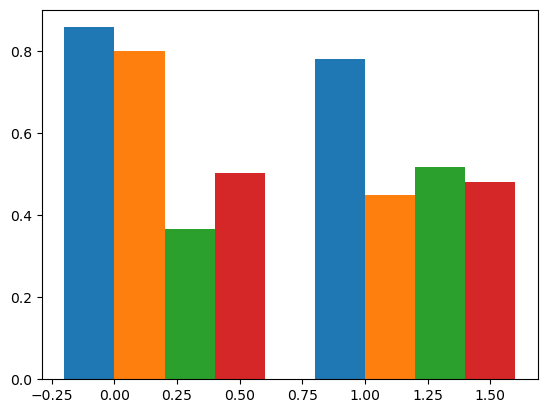

In [11]:
models = ['SVM', 'Decision Tree']
accuracy = [svm_metrics[0], dt_metrics[0]]
precision = [svm_metrics[1], dt_metrics[1]]
recall = [svm_metrics[2], dt_metrics[2]]
f1 = [svm_metrics[3], dt_metrics[3]]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')
rects3 = ax.bar(x + 3*width/2, recall, width, label='Recall')
rects4 = ax.bar(x + 5*width/2, f1, width, label='F1 Score')